<a href="https://colab.research.google.com/github/carlos-navarro-naranjo/Classifying-movie-reviews-A-binary-classificationset/blob/main/Classifying_movie_reviews_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classifying movie reviews: A binary classification example
The IMDB dataset
Loading the IMDB dataset

In [14]:
import tensorflow
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

Decoding reviews back to text

In [15]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

Preparing the data
Encoding the integer sequences via multi-hot encoding

In [16]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Building your** **model** 

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(15, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling the model

In [26]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Validating your approach
Setting aside a validation set

In [27]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [28]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5635 - accuracy: 0.7779 - val_loss: 0.4383 - val_accuracy: 0.8687
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3538 - accuracy: 0.8983 - val_loss: 0.3530 - val_accuracy: 0.8643
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2528 - accuracy: 0.9225 - val_loss: 0.2868 - val_accuracy: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1966 - accuracy: 0.9374 - val_loss: 0.2846 - val_accuracy: 0.8853
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1583 - accuracy: 0.9503 - val_loss: 0.2830 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1316 - accuracy: 0.9599 - val_loss: 0.3012 - val_accuracy: 0.8836
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1105 - accuracy: 0.9649 - val_loss: 0.3109 - val_accuracy: 0.8829
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss

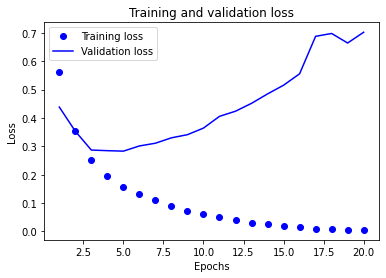

In [29]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the training and validation accuracy

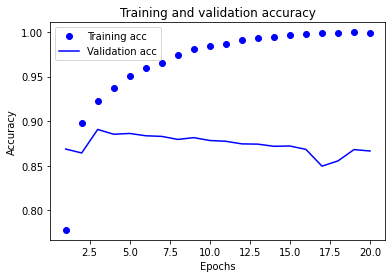

In [30]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [32]:
from tensorflow import keras
model = keras.Sequential([
    
    layers.Dense(15, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)
print (results)

Epoch 1/6
49/49 [==============================] - 3s 32ms/step - loss: 0.5092 - accuracy: 0.8150
Epoch 2/6
49/49 [==============================] - 2s 31ms/step - loss: 0.2995 - accuracy: 0.9046
Epoch 3/6
49/49 [==============================] - 2s 31ms/step - loss: 0.2237 - accuracy: 0.9241
Epoch 4/6
49/49 [==============================] - 2s 32ms/step - loss: 0.1837 - accuracy: 0.9358
Epoch 5/6
49/49 [==============================] - 2s 32ms/step - loss: 0.1581 - accuracy: 0.9450
Epoch 6/6
782/782 [==============================] - 2s 3ms/step - loss: 0.3114 - accuracy: 0.8795
[0.311397910118103, 0.8795199990272522]


Conclusion:

I have tried to use 1 hidden layer, 2 hidden layers & 3 hidden layers
I also have tried layers with 500, 100, 50, 15, 12 & 10 layers and aside of the 500 wich got me a notable low accuracy. I have been getting about the same result in terms of accuracy & loss.
I also changed the binary_crossentropy for mse loss and teh accuracy keeps giving me the same percentage.
I even used the tanh activation instead of relu, however there was almost no change.

I decided to go with this model, because in terms of accuracy and loss it was performing quite well.